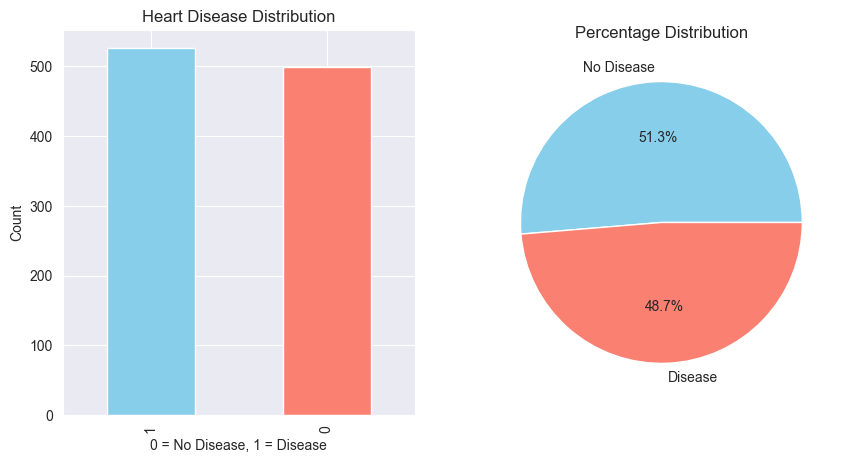

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('../heart.csv')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(df['target'].value_counts(), labels=['No Disease', 'Disease'],
        autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Percentage Distribution')
plt.show()

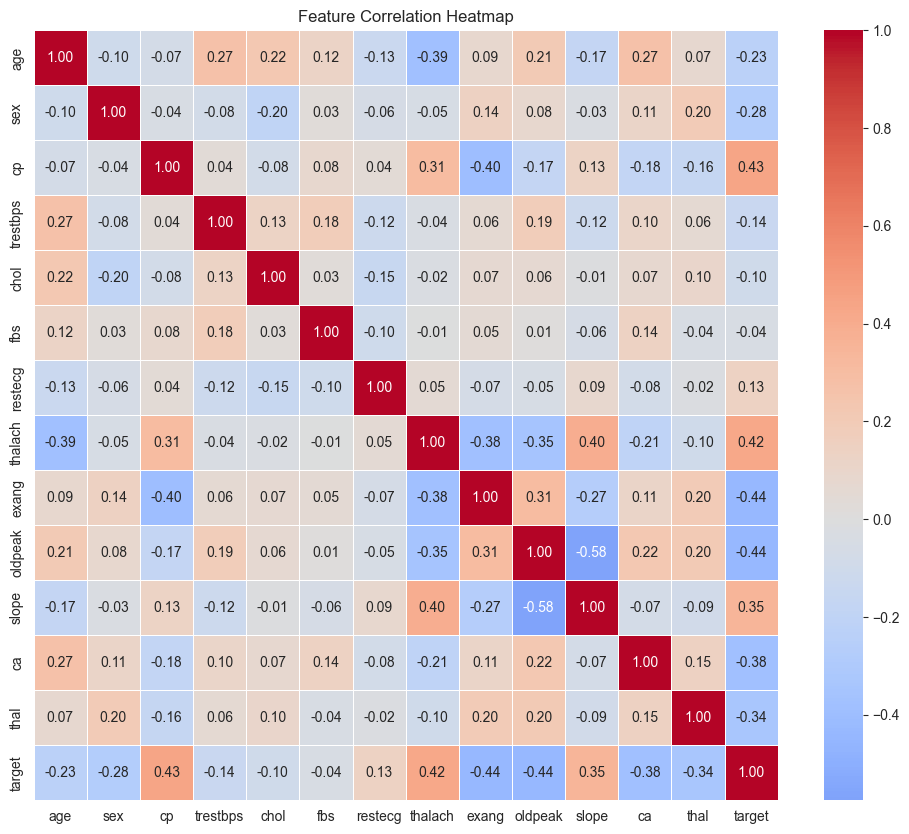

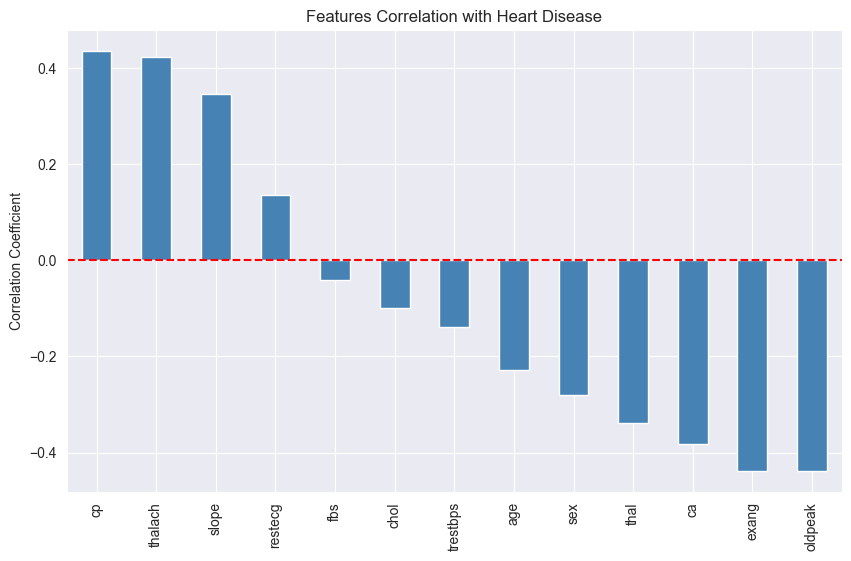

In [24]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Top correlations with target
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation_with_target.drop('target').plot(kind='bar', color='steelblue')
plt.title('Features Correlation with Heart Disease')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

C:\Users\Kiro\AppData\Local\Temp\ipykernel_27424\4131705548.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Kiro\AppData\Local\Temp\ipykernel_27424\4131705548.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Kiro\AppData\Local\Temp\ipykernel_27424\4131705548.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Kiro\AppData\Local\Temp\ipykernel_27424\4131705548.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

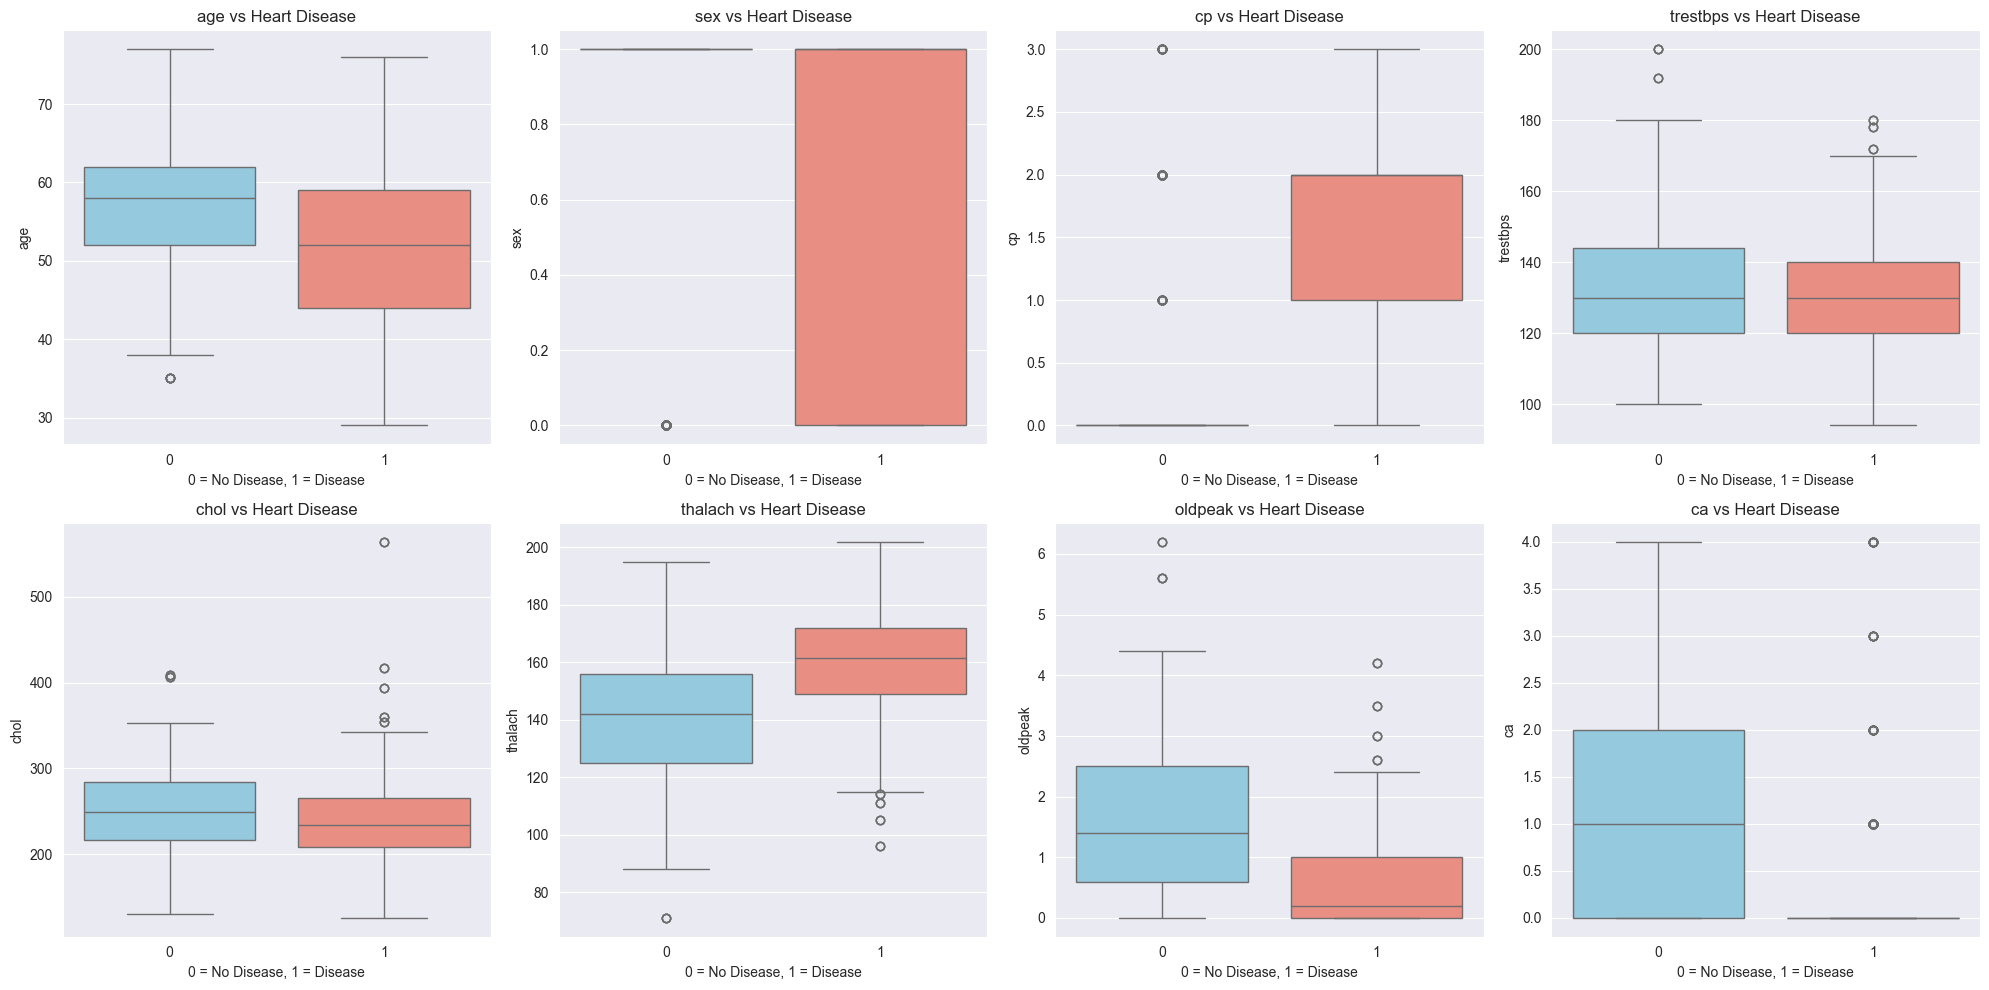

In [19]:
# Select key features for visualization
key_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    if df[feature].dtype in ['int64', 'float64']:
        # Boxplot for numerical features
        sns.boxplot(x='target', y=feature, data=df, ax=axes[i],
                   palette=['skyblue', 'salmon'])
    else:
        # Countplot for categorical features
        sns.countplot(x=feature, hue='target', data=df, ax=axes[i],
                     palette=['skyblue', 'salmon'])
    axes[i].set_title(f'{feature} vs Heart Disease')
    axes[i].set_xlabel('0 = No Disease, 1 = Disease')

plt.tight_layout()
plt.show()

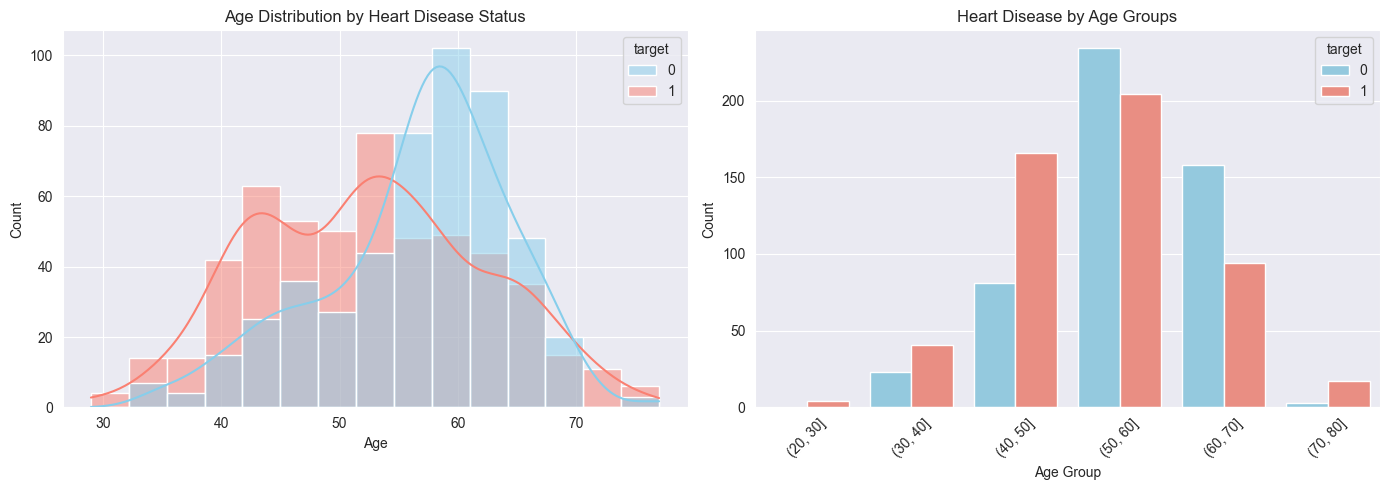

In [20]:
plt.figure(figsize=(14, 5))

# Histogram by age
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='target', kde=True,
             palette=['skyblue', 'salmon'], bins=15)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')

# Boxplot by age groups
plt.subplot(1, 2, 2)
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80])
sns.countplot(x='age_group', hue='target', data=df,
              palette=['skyblue', 'salmon'])
plt.title('Heart Disease by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

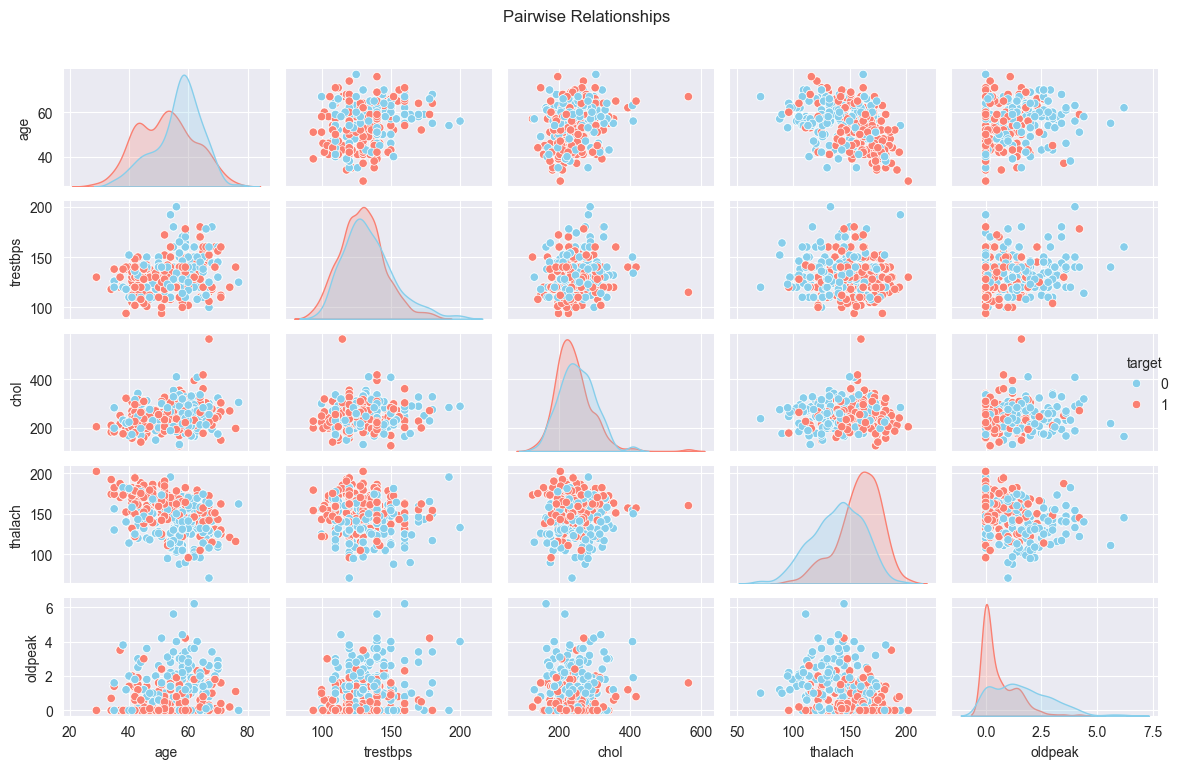

In [29]:
# # Select most important features for pairplot
important_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
# sns.pairplot(df[important_features], hue='target',
#              palette=['skyblue', 'salmon'], diag_kind='kde')
# plt.suptitle('Pairwise Relationships', y=1.02)
# plt.show()

sns.pairplot(df[important_features], hue='target',
             palette=['skyblue', 'salmon'],
             diag_kind='kde',
             height=1.5,  # ارتفاع كل مخطط فرعي
             aspect=1.5)  # نسبة العرض إلى الارتفاع

plt.suptitle('Pairwise Relationships', y=1.02)
plt.tight_layout()
plt.show()

C:\Users\Kiro\AppData\Local\Temp\ipykernel_27424\1316569562.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, ax=axes[0,1],
C:\Users\Kiro\AppData\Local\Temp\ipykernel_27424\1316569562.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, ax=axes[0,2],


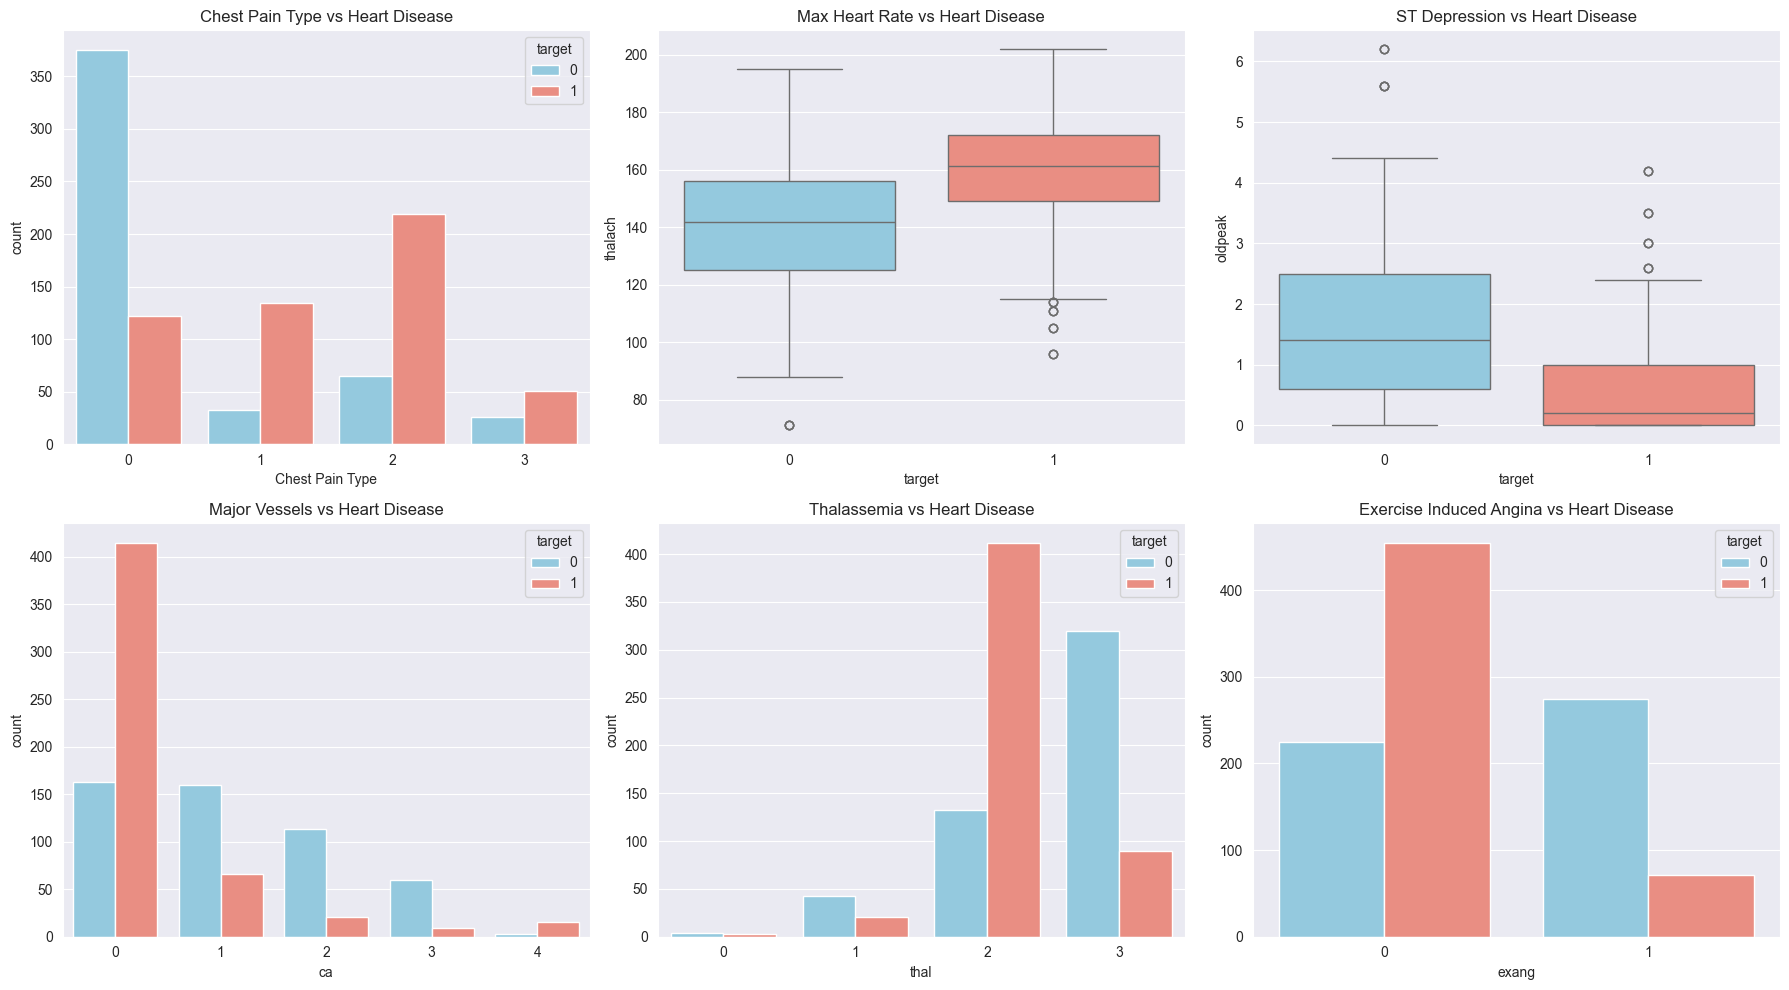

In [8]:
# Create risk factor columns (example)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Chest Pain Type
sns.countplot(x='cp', hue='target', data=df, ax=axes[0,0],
              palette=['skyblue', 'salmon'])
axes[0,0].set_title('Chest Pain Type vs Heart Disease')
axes[0,0].set_xlabel('Chest Pain Type')

# 2. Maximum Heart Rate
sns.boxplot(x='target', y='thalach', data=df, ax=axes[0,1],
            palette=['skyblue', 'salmon'])
axes[0,1].set_title('Max Heart Rate vs Heart Disease')

# 3. ST Depression
sns.boxplot(x='target', y='oldpeak', data=df, ax=axes[0,2],
            palette=['skyblue', 'salmon'])
axes[0,2].set_title('ST Depression vs Heart Disease')

# 4. Number of Major Vessels
sns.countplot(x='ca', hue='target', data=df, ax=axes[1,0],
              palette=['skyblue', 'salmon'])
axes[1,0].set_title('Major Vessels vs Heart Disease')

# 5. Thalassemia
sns.countplot(x='thal', hue='target', data=df, ax=axes[1,1],
              palette=['skyblue', 'salmon'])
axes[1,1].set_title('Thalassemia vs Heart Disease')

# 6. Exercise Induced Angina
sns.countplot(x='exang', hue='target', data=df, ax=axes[1,2],
              palette=['skyblue', 'salmon'])
axes[1,2].set_title('Exercise Induced Angina vs Heart Disease')

plt.tight_layout()
plt.show()

In [10]:
import plotly.express as px
import plotly.graph_objects as go

# Interactive scatter plot
fig = px.scatter(df, x='age', y='chol', color='target',
                 size='trestbps', hover_data=['cp', 'thalach'],
                 title='Interactive Heart Disease Analysis',
                 labels={'target': 'Heart Disease'},
                 color_discrete_map={0: 'skyblue', 1: 'salmon'})
fig.show()

# 3D scatter plot
fig = px.scatter_3d(df, x='age', y='chol', z='thalach',
                    color='target', symbol='sex',
                    title='3D Heart Disease Analysis',
                    color_discrete_map={0: 'blue', 1: 'red'})
fig.show()

In [11]:
# Normalize features for radar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_for_radar = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
normalized_features = scaler.fit_transform(df[features_for_radar])
normalized_df = pd.DataFrame(normalized_features, columns=features_for_radar)
normalized_df['target'] = df['target'].values

# Create radar chart data
disease_data = normalized_df[normalized_df['target'] == 1].mean()
no_disease_data = normalized_df[normalized_df['target'] == 0].mean()

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=disease_data.values,
    theta=features_for_radar,
    fill='toself',
    name='Heart Disease',
    fillcolor='rgba(255, 99, 71, 0.3)',
    line_color='salmon'
))
fig.add_trace(go.Scatterpolar(
    r=no_disease_data.values,
    theta=features_for_radar,
    fill='toself',
    name='No Disease',
    fillcolor='rgba(135, 206, 235, 0.3)',
    line_color='skyblue'
))
fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
                  title="Heart Disease Radar Chart")
fig.show()